## Real Aug 20th 
About the real phe expriment to find the error

In [2]:
import numpy as np
import pandas as pd
import magenpy as mgp
import viprs as vp
import subprocess
import io
from viprs.eval.metrics import r2 
from data.utils.Simulate_training import ELBO_plot
from data.utils.Simulate_training import *
from sklearn.preprocessing import scale
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import pearsonr

<h5>Use GridSearch to find suitable hyperparameter for M step </h5>

In [13]:
np.random.seed(1235)
# real_phe for 2706 samples
realA22_gdl = mgp.GWADataLoader(
    bed_files = "CMAll_qced/chr22/ALL_chr22",
    phenotype_file="data/phenotype_data/DREAM_pheno_Full.csv",
)

realA22Train_gdl, realA22Val_gdl = realA22_gdl.split_by_samples(proportions=[.8, .2])

realA22Train_gdl.compute_ld(estimator='sample',
                output_dir='Real_phe_expr/TRall_chr22_out/')

realA22Train_gdl.perform_gwas()
realA22Train_gdl.to_summary_statistics_table().to_csv(
    "Real_phe_expr/TRreal_chr22.sumstats", sep="\t", index=False
)



> Reading BED file...
> Reading phenotype file...
> Computing LD matrix...


/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/dask/array/routines.py:318: PerformanceWarning: Increasing number of chunks by factor of 18
  axes=(left_axes, right_axes),
/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


> Performing GWAS...


/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


In [14]:
# use training set here

# Create a grid:
grid = vp.HyperparameterGrid()
# Generate a grid for pi using 5 equidistant grid points:
# the inputs can be : realTrain_gdl, realA22Train_gdl
grid.generate_pi_grid(steps=8, n_snps=realA22Train_gdl.n_snps)
# Generate a grid for sigma epsilon using 5 equidistant grid points:
grid.generate_sigma_epsilon_grid(steps=8)

vgv_gs = vp.VIPRSGridSearch(realA22Train_gdl, grid)
vgv_gs = vgv_gs.fit()

> Initializing model parameters
> Loading LD matrices into memory...
> Performing model fit...
> Using up to 1 threads.


  0%|          | 1/1000 [00:18<5:15:08, 18.93s/it]/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Stopping at iteration 2 for model 12: The optimization algorithm is not converging!
Previous ELBO: 285889.590961 | Current ELBO: 641574.771017
  if sys.path[0] == "":
/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Stopping at iteration 2 for model 13: The optimization algorithm is not converging!
Previous ELBO: 115476.774913 | Current ELBO: 292990.947935
  if sys.path[0] == "":
/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Stopping at iteration 2 for model 16: The optimization algorithm is not converging!
Previous ELBO: 68880.940788 | Current ELBO: 149334.401193
  if sys.path[0] == "":
/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Stopping at iterat

/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Stopping at iteration 3 for model 35: The optimization algorithm is not converging!
Previous ELBO: -728.544560 | Current ELBO: 825.426047
  if sys.path[0] == "":
/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Stopping at iteration 3 for model 40: The optimization algorithm is not converging!
Previous ELBO: -1617.916851 | Current ELBO: 795.652060
  if sys.path[0] == "":
/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Stopping at iteration 3 for model 41: The optimization algorithm is not converging!
Previous ELBO: -1568.061389 | Current ELBO: 811.993012
  if sys.path[0] == "":
/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Iteration 3 | Model 48: ELBO dropped from -2984.042019 to -2999.578380.
  if sys

Model 7 converged at iteration 49 | ELBO: 6697064360651.634766


 18%|█▊        | 177/1000 [23:51<1:45:01,  7.66s/it]

Model 45 converged at iteration 177 || ELBO: -2597.103323


 20%|██        | 204/1000 [27:07<1:34:59,  7.16s/it]

Model 31 converged at iteration 204 | ELBO: 952.737250


 22%|██▏       | 215/1000 [28:23<1:29:47,  6.86s/it]

Model 23 converged at iteration 215 | ELBO: 17921.772159


 26%|██▌       | 259/1000 [33:11<1:21:59,  6.64s/it]

Model 38 converged at iteration 259 || ELBO: -1641.799625


 32%|███▏      | 317/1000 [39:16<1:10:50,  6.22s/it]

Model 39 converged at iteration 317 | ELBO: -1804.175517


 32%|███▏      | 319/1000 [39:27<1:08:12,  6.01s/it]

Model 30 converged at iteration 319 || ELBO: 4228.900944


100%|██████████| 1000/1000 [1:43:56<00:00,  6.24s/it]

> Optimization is complete for all 64 models.


In [15]:
# find the best model on validation set
vgv_gs.select_best_model(validation_gdl=realA22Val_gdl, criterion='validation')

/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/pandas/core/frame.py:3678: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[col] = igetitem(value, i)


> Generating polygenic scores...
> Based on the validation criterion, selected model: 37
> Model details:

sigma_epsilon    5.714284e-01
pi               7.196857e-02
ELBO             1.806731e+07
Validation_R2    1.260866e-02
Name: 37, dtype: float64


In [19]:
1.260866e-02

0.01260866

In [11]:
# Use criterion = "ELBO" the ELbo result is not what we expected. 

In [18]:
# find the best model on validation set
vgv_gs.select_best_model(validation_gdl=realA22Val_gdl, criterion='pseudo_validation')

KeyError: "Column 'STD_BETA' is not available in the SNP table!"

<h5>for real phe for chr22 binary files </h5>
Try without adding CM 

In [3]:
np.random.seed(1235)
# real_phe for 2706 samples
realA22_gdl = mgp.GWADataLoader(
    bed_files = "CMAll_qced/chr22/ALL_chr22",
    # phenotype_file="data/phenotype_data/DREAM_pheno_Full.csv",
    phenotype_file = "data/phenotype_data/DREAM_pheno_Full.csv",
)
#"Toy_example_expr/phenotype/shuffle500_phe.csv"

realA22Train_gdl, realA22Val_gdl = realA22_gdl.split_by_samples(proportions=[.8, .2])

realA22Train_gdl.perform_gwas()
realA22Train_gdl.to_summary_statistics_table().to_csv(
    "Real_phe_expr/real_chr22NOCM.sumstats", sep="\t", index=False
)


realA22Train_gdl.compute_ld(estimator='sample',
                output_dir='Real_phe_expr/all_chr22_out/')


print(realA22Train_gdl.sample_size)
print(realA22Val_gdl.sample_size)

> Reading BED file...
> Reading phenotype file...
> Performing GWAS...


/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


> Computing LD matrix...


/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/dask/array/routines.py:318: PerformanceWarning: Increasing number of chunks by factor of 18
  axes=(left_axes, right_axes),
/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


2178
528


In [74]:
1.000000e-01

0.1

In [4]:
v = vp.VIPRS(realA22Train_gdl, fix_params={'pi':0.05, 'sigma_epsilon':  0.70}) 
# v = vp.VIPRS(realA22Train_gdl) 
# theta_0 = {'pi': 0.999945, 'sigma_epsilon': 0.50}
# v.initialize(theta_0=theta_0)
v.fit()

> Initializing model parameters
> Loading LD matrices into memory...
> Performing model fit...
> Using up to 1 threads.


 16%|█▋        | 164/1000 [01:33<07:55,  1.76it/s]

Converged at iteration 165 || ELBO: -2469.668409
> Final ELBO: -2469.668409
> Estimated heritability: 0.357371
> Estimated proportion of causal variants: 0.050000


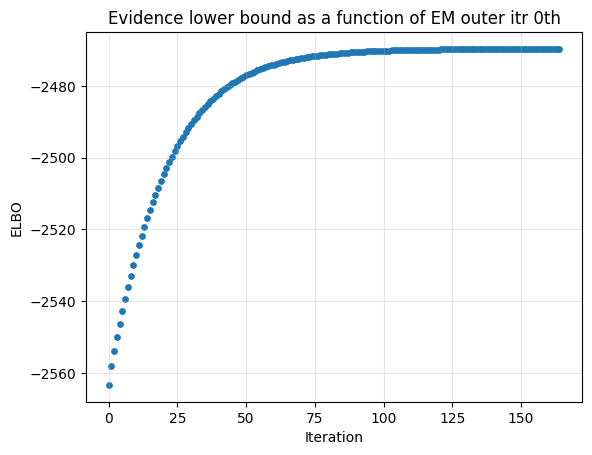

In [5]:
ELBO_plot(v.history['ELBO'], "Real_phe_expr/ELBO_plots/real_ALL_chr22.png",itr=0)

> Generating polygenic scores...
0.0022903322327963724
-0.04785741565103964


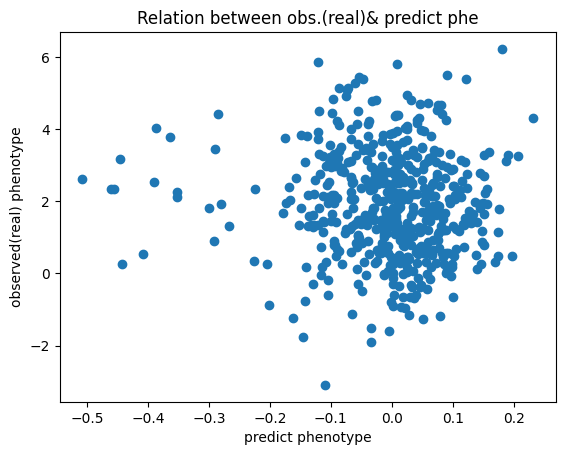

In [6]:
pred = v.predict(realA22Val_gdl)
print(r2(pred, realA22Val_gdl.sample_table.phenotype))
# Pearson Correlation 
corr_train, p_value_train = pearsonr(pred, realA22Val_gdl.sample_table.phenotype)
print(corr_train)

plot_obs_vs_pred(realA22Val_gdl.sample_table.phenotype, pred)

On training set to predict

> Generating polygenic scores...
R2: 0.3576967436418387
R:  0.5980775398239249


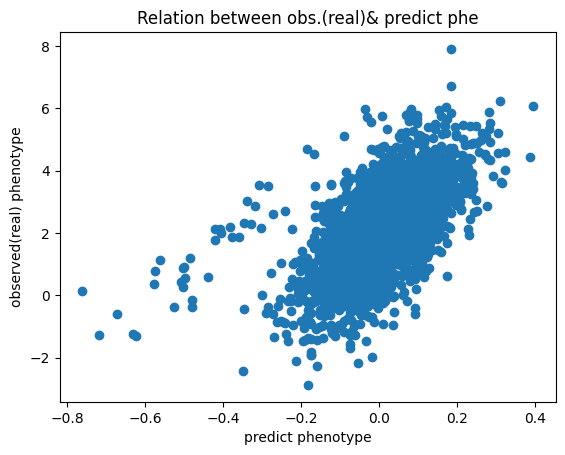

In [9]:
# I guess it is also not high. 
pred = v.predict(realA22Train_gdl)
print("R2:", r2(pred, realA22Train_gdl.sample_table.phenotype))
# Pearson Correlation 
corr_train, p_value_train = pearsonr(pred, realA22Train_gdl.sample_table.phenotype)
print("R: ",corr_train)

plot_obs_vs_pred(realA22Train_gdl.sample_table.phenotype, pred)

<h5>For real phe for chr22 add covariates </h5>


Create covariates contains:<code> baselineDAS, sex, age </code>  

In [138]:
chr22_covADDPC10 = pd.read_csv("data/Dosage_for_PCA/chr22_covariates.csv", sep="\t")
extract_col = ["FID", "IID", "baselineDAS", "Age", "Gender"]
chr22_Cov = chr22_covADDPC10[extract_col]
chr22_Cov.to_csv("data/Dosage_for_PCA/NoDos_NOHead_Cov.csv", header=False, index=False, sep='\t')


I tested this using the fixed_paras = {'pi':0.99994, 'sigma_epsilon':  0.50}
This obtained from GridSearch on training data with "validation" critation.  
Covariates: <code>baselineDAS, sex, age, 10PCs from the chr22 dosage file</code>

In [139]:
np.random.seed(1235)
# real_phe for 2706 samples
realA22_gdl = mgp.GWADataLoader(
    bed_files = "CMAll_qced/chr22/ALL_chr22",
    # phenotype_file="data/phenotype_data/DREAM_pheno_Full.csv",
    phenotype_file = "data/phenotype_data/DREAM_pheno_Full.csv",
    covariates_file="data/Dosage_for_PCA/NoDos_NOHead_Cov.csv"
)
#"Toy_example_expr/phenotype/shuffle500_phe.csv"

realA22Train_gdl, realA22Val_gdl = realA22_gdl.split_by_samples(proportions=[.8, .2])

realA22Train_gdl.compute_ld(estimator='sample',
                output_dir='Real_phe_expr/all_chr22_out/')

realA22Train_gdl.perform_gwas()
realA22Train_gdl.to_summary_statistics_table().to_csv(
    "Real_phe_expr/real_chr22NOCM.sumstats", sep="\t", index=False
)

print(realA22Train_gdl.sample_size)
print(realA22Val_gdl.sample_size)

> Reading BED file...
> Reading phenotype file...
> Reading covariates file...
> Computing LD matrix...


/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/dask/array/routines.py:318: PerformanceWarning: Increasing number of chunks by factor of 18
  axes=(left_axes, right_axes),
/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


> Performing GWAS...


/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


2177
528


In [140]:
v = vp.VIPRS(realA22Train_gdl, fix_params={'pi':0.05, 'sigma_epsilon':  0.70}) 
# v = vp.VIPRS(realA22Train_gdl) 
# theta_0 = {'pi': 0.999945, 'sigma_epsilon': 0.50}
# v.initialize(theta_0=theta_0)
v.fit()

> Initializing model parameters
> Loading LD matrices into memory...
> Performing model fit...
> Using up to 1 threads.


 17%|█▋        | 170/1000 [01:53<09:16,  1.49it/s]

Converged at iteration 171 || ELBO: -2402.901247
> Final ELBO: -2402.901247
> Estimated heritability: 0.377202
> Estimated proportion of causal variants: 0.050000


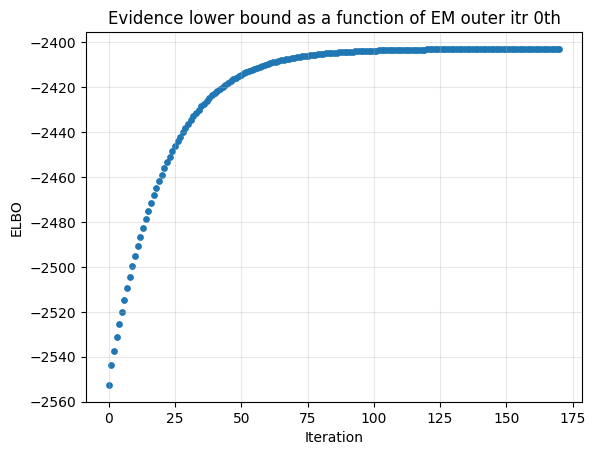

In [141]:
ELBO_plot(v.history['ELBO'], "Real_phe_expr/ELBO_plots/real_ALL_chr22.png",itr=0)

> Generating polygenic scores...
0.004919586135278359
-0.07013976144298154


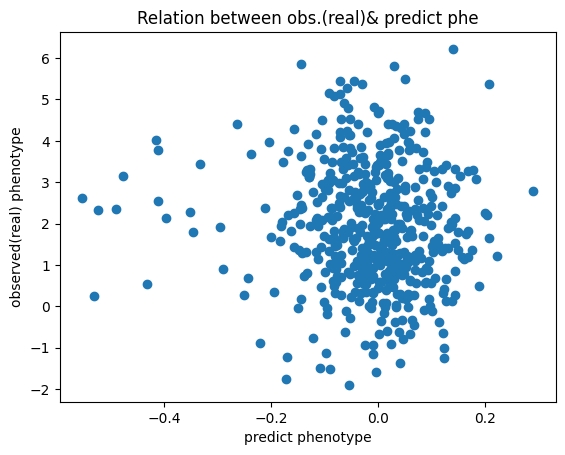

In [142]:
pred = v.predict(realA22Val_gdl)
print(r2(pred, realA22Val_gdl.sample_table.phenotype))
# Pearson Correlation 
corr_train, p_value_train = pearsonr(pred, realA22Val_gdl.sample_table.phenotype)
print(corr_train)

plot_obs_vs_pred(realA22Val_gdl.sample_table.phenotype, pred)

<h3>Try to extrct chr22,21,20 from 2706 trainning samples </h3>

1. Create the .txt file with SNPs from <code> chr22,21,20 from merge10.bim </code>file. And sorted them according the the SNP names (code cell is below)
2. Use plink command to filter the binary file sets based on this .txt SPNs file and produce 3 new .bed+ .fam+ .bim files. Command:  
Under the folder <code> /CMAll_qced/chr222120 </code>, then run:  
<code > plink --bfile ../merged10 --extract ../ALL_chr222120.txt  
--make-bed --out ALL_chr222120 </code>
3. Since if we don't use plink backend in mgp, no need as to update the CM. (The plink needs the old version that haven't installed.)

In [58]:
merge10 = pd.read_csv("CMAll_qced/merged10.bim", sep="\t", header=None)

ALL222120 = merge10[merge10[0].isin([22, 21, 20])][1]  # [1] means the snp_IDs
ALL222120_sort = ALL222120.sort_values()
ALL222120_sort.to_csv("CMAll_qced/ALL_chr222120.txt", header=False,
                      index=False, sep="\t")


In [59]:
# read the newly created .bim file
# without CM

ALL222120_sort_read= pd.read_csv("CMAll_qced/chr222120/ALL_chr222120.bim", sep="\t",header=None)
#d1CM22_sorted_bim.sort_values(by=[2])
ALL222120_sort_read

,0,1,2,3,4,5
0,20,rs6139074,0.28,11244,C,A
1,20,rs4814683,0.00,61795,T,G
2,20,rs1418258,0.00,63799,A,G
3,20,rs6086616,0.00,68749,A,G
4,20,rs6039403,0.00,69094,A,G
...,...,...,...,...,...,...
70543,22,rs3810648,0.00,51175626,G,A
70544,22,rs2285395,0.00,51178090,A,G
70545,22,rs2238837,0.00,51212875,C,A
70546,22,rs34726907,0.00,51213613,T,C


<h5>For Chr22,21,20 on real phe on 2706 samples </h5>
Similar to before, but based on snps in chr 22,21,20 

In [60]:
np.random.seed(1235)
# real_phe for 2706 samples
realA22_gdl = mgp.GWADataLoader(
    bed_files = "CMAll_qced/chr222120/ALL_chr222120",
    # phenotype_file="data/phenotype_data/DREAM_pheno_Full.csv",
    phenotype_file = "data/phenotype_data/DREAM_pheno_Full.csv",
)
#"Toy_example_expr/phenotype/shuffle500_phe.csv"

realA22Train_gdl, realA22Val_gdl = realA22_gdl.split_by_samples(proportions=[.8, .2])

realA22Train_gdl.perform_gwas()
realA22Train_gdl.to_summary_statistics_table().to_csv(
    "Real_phe_expr/real_chr222120.sumstats", sep="\t", index=False
)


realA22Train_gdl.compute_ld(estimator='sample',
                output_dir='Real_phe_expr/all_chr222120LD/')


print(realA22Train_gdl.sample_size)
print(realA22Val_gdl.sample_size)

> Reading BED file...
> Reading phenotype file...


Performing GWAS:   0%|          | 0/3 [00:00<?, ?it/s]/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
Performing GWAS:  33%|███▎      | 1/3 [00:09<00:18,  9.29s/it]/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
Performing GWAS:  67%|██████▋   | 2/3 [00:14<00:06,  6.92s/it]/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
Computing LD matrices:   0%|          | 0/3 [00:00<?, ?it/s]/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/dask/array/routines.py:318: PerformanceWarning: Increasing number of chunks by factor of 33
 

2178
528


In [70]:
v = vp.VIPRS(realA22Train_gdl, fix_params={'pi':0.01, 'sigma_epsilon':  0.90}) 
# v = vp.VIPRS(realA22Train_gdl) 
# theta_0 = {'pi': 0.01, 'sigma_epsilon': 0.50}
# v.initialize(theta_0=theta_0)
v.fit()

> Initializing model parameters
> Loading LD matrices into memory...
> Performing model fit...
> Using up to 1 threads.


 42%|████▏     | 419/1000 [24:52<34:29,  3.56s/it] 

Converged at iteration 420 || ELBO: -2642.710111
> Final ELBO: -2642.710111
> Estimated heritability: 0.311490
> Estimated proportion of causal variants: 0.010000


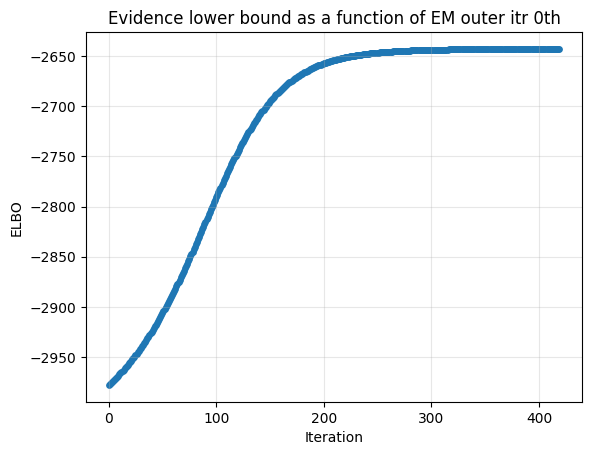

In [71]:
ELBO_plot(v.history['ELBO'], "Real_phe_expr/ELBO_plots/real_ALL_chr222120.png",itr=0)

Generating polygenic scores: 100%|██████████| 3/3 [00:02<00:00,  1.11it/s]

0.003191602134341785
-0.05649426638466759


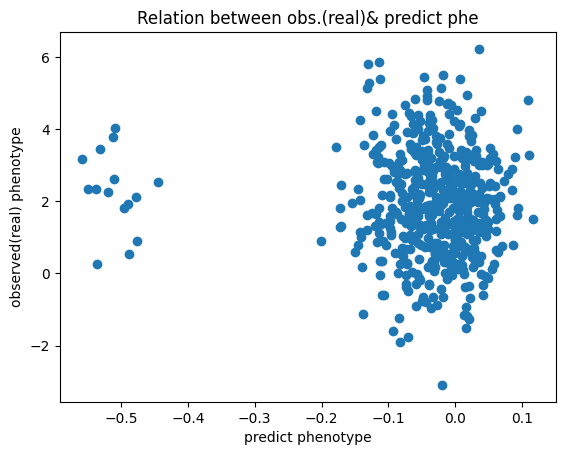

In [72]:
pred = v.predict(realA22Val_gdl)
print(r2(pred, realA22Val_gdl.sample_table.phenotype))
# Pearson Correlation 
corr_train, p_value_train = pearsonr(pred, realA22Val_gdl.sample_table.phenotype)
print(corr_train)

plot_obs_vs_pred(realA22Val_gdl.sample_table.phenotype, pred)

<h3>Use plink to get 10PCs from chr22 ALL_Chr22 file </h3>

The commend is :  
<code>
cd CMAll_qced/chr22_plink10PCs  
plink --bfile ../chr22/ALL_chr22 --pca 10 --make-bed --out plink10PC  </code>

create the <code>.eigenval, .eigenvec</code>, but the created binary fils are the same as the input bfile. It seems the 10 PCs cannot transfer to binary files. 